## Assignment No.1

In [1]:
!pip install scikit-learn
!pip install matplotlib seaborn

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Step 1: Load the dataset
url = 'https://media.geeksforgeeks.org/wp-content/uploads/Wine.csv'
data = pd.read_csv(url)
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [4]:
# Filter the dataset to include only red and white wines (assuming these are represented by specific Customer_Segment values)
# Example: Let's assume '1' represents red wine and '2' represents white wine
red_white_data = data[data['Customer_Segment'].isin([1, 2])]

In [5]:
# Step 2: Preprocess the data
# Extract features (all columns except the target variable 'Customer_Segment')
features = red_white_data.columns[1:]

In [6]:
# Separate out the features and the target variable
X = data[features]
y = data['Customer_Segment']

In [7]:
# Separate out the features and the target variable
X = red_white_data[features]
y = red_white_data['Customer_Segment']

In [8]:
# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Step 3: Apply PCA
# Instantiate PCA and fit the data
pca = PCA(n_components=2)  # Let's reduce to 2 components for visualization
principal_components = pca.fit_transform(X_scaled)

In [10]:
# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [11]:
# Add the target variable to the DataFrame
principal_df['Customer_Segment'] = y

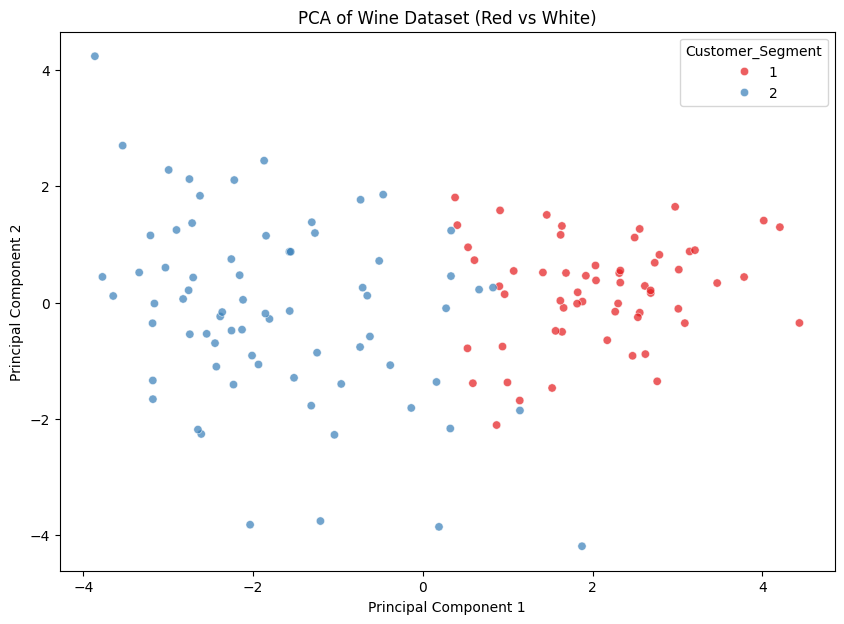

In [12]:
# Step 4: Visualize the results
# Plot the principal components
plt.figure(figsize=(10, 7))
sns.scatterplot(data=principal_df, x='PC1', y='PC2', hue='Customer_Segment', palette='Set1', alpha=0.7)
plt.title('PCA of Wine Dataset (Red vs White)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [13]:
# Display explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by the 2 principal components: {explained_variance}")
print(f"Total explained variance: {sum(explained_variance)}")

Explained variance by the 2 principal components: [0.37592784 0.13638016]
Total explained variance: 0.5123079978275279
